In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed Hyperparameters
num_classes = 4
max_steps = 2000
convergence_interval = "overfit"
num_samples = 20
batch_size = 20
learning_rate = 1e-3

# Variable Hyperparameters
num_qubits_list = [4, 8]
r_list = [0.0, 0.5, 1.0]
var_ansatz_list = ["QCNN_not_shared", "QCNN_shared", "SEL"]
num_layers_list = [1, 3, 5, 7, 9]

def get_data(num_qubits, r, var_ansatz, num_layers, exp_range=5):
    g_list = []
    test_acc_list = []
    mu_marg_Q1_list = []
    mu_marg_Q2_list = []
    mu_marg_mean_list = []
    mu_param_list = []
    mu_param_eff10_list = []
    mu_param_eff100_list = []

    for exp in range(1, exp_range + 1):
        PATH = f'../../results/{num_classes}C/{r}R/{num_qubits}Q/{var_ansatz}/{num_layers}L_5000MS_Full BatchBS_0.001LR_overfitconv/20S/{exp}E/'
        g_list.append(np.load(PATH + 'generalization_gap.npy'))
        test_acc_list.append(np.load(PATH + 'test_acc.npy'))
        mu_marg_Q1_list.append(np.load(PATH + 'mu_marg_Q1.npy'))
        mu_marg_Q2_list.append(np.load(PATH + 'mu_marg_Q2.npy'))
        mu_marg_mean_list.append(np.load(PATH + 'mu_marg_mean.npy'))
        mu_param_list.append(np.load(PATH + 'mu_param.npy'))
        mu_param_eff10_list.append(np.load(PATH + 'mu_param_eff10.npy'))
        mu_param_eff100_list.append(np.load(PATH + 'mu_param_eff100.npy'))

    # Convert lists to numpy arrays for easy computation
    g_array = np.array(g_list)
    test_acc_array = np.array(test_acc_list)
    mu_marg_Q1_array = np.array(mu_marg_Q1_list)
    mu_marg_Q2_array = np.array(mu_marg_Q2_list)
    mu_marg_mean_array = np.array(mu_marg_mean_list)
    mu_param_array = np.array(mu_param_list)
    mu_param_eff10_array = np.array(mu_param_eff10_list)
    mu_param_eff100_array = np.array(mu_param_eff100_list)

    # Calculate mean and standard deviation
    g_mean, g_std = np.mean(g_array, axis=0), np.std(g_array, axis=0)
    test_acc_mean, test_acc_std = np.mean(test_acc_array, axis=0), np.std(test_acc_array, axis=0)
    mu_marg_Q1_mean, mu_marg_Q1_std = np.mean(mu_marg_Q1_array, axis=0), np.std(mu_marg_Q1_array, axis=0)
    mu_marg_Q2_mean, mu_marg_Q2_std = np.mean(mu_marg_Q2_array, axis=0), np.std(mu_marg_Q2_array, axis=0)
    mu_marg_mean_mean, mu_marg_mean_std = np.mean(mu_marg_mean_array, axis=0), np.std(mu_marg_mean_array, axis=0)
    mu_param_mean, mu_param_std = np.mean(mu_param_array, axis=0), np.std(mu_param_array, axis=0)
    mu_param_eff10_mean, mu_param_eff10_std = np.mean(mu_param_eff10_array, axis=0), np.std(mu_param_eff10_array, axis=0)
    mu_param_eff100_mean, mu_param_eff100_std = np.mean(mu_param_eff100_array, axis=0), np.std(mu_param_eff100_array, axis=0)

    return (g_mean, g_std), (test_acc_mean, test_acc_std), (mu_marg_Q1_mean, mu_marg_Q1_std), (mu_marg_Q2_mean, mu_marg_Q2_std) , (mu_marg_mean_mean, mu_marg_mean_std), (mu_param_mean, mu_param_std), (mu_param_eff10_mean, mu_param_eff10_std), (mu_param_eff100_mean, mu_param_eff100_std)

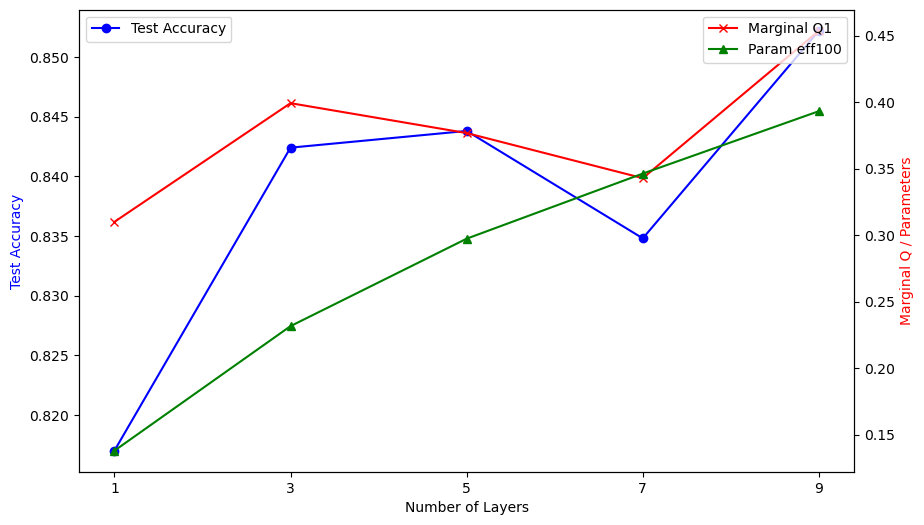

In [113]:
import matplotlib.pyplot as plt

# Assuming num_layers_list is defined somewhere above
# num_layers_list = [1, 3, 5, 7, 9] 

def getplot_layers(num_qubits, var_ansatz, r, exp_range=5):
    fig, ax_left = plt.subplots(figsize=(10, 6))

    # Create a second y-axis sharing the same x-axis
    ax_right = ax_left.twinx()

    g_mean_list = []
    test_acc_mean_list = []
    mu_marg_Q1_mean_list = []
    mu_marg_Q2_mean_list = []
    mu_marg_mean_mean_list = []
    mu_param_mean_list = []
    mu_param_eff10_mean_list = []
    mu_param_eff100_mean_list = []

    for num_layers in num_layers_list:
        (g_mean, _), (test_acc_mean, _), (mu_marg_Q1_mean, _), (mu_marg_Q2_mean, _), (mu_marg_mean_mean, _), (mu_param_mean, _), (mu_param_eff10_mean, _), (mu_param_eff100_mean, _) = get_data(num_qubits, r, var_ansatz, num_layers, exp_range)
        
        g_mean_list.append(g_mean)
        test_acc_mean_list.append(test_acc_mean)
        mu_marg_Q1_mean_list.append(mu_marg_Q1_mean)
        mu_marg_Q2_mean_list.append(mu_marg_Q2_mean)
        mu_marg_mean_mean_list.append(mu_marg_mean_mean)
        mu_param_mean_list.append(np.sqrt(mu_param_mean) / 100)
        mu_param_eff10_mean_list.append(np.sqrt(mu_param_eff10_mean) / 100)  
        mu_param_eff100_mean_list.append(np.sqrt(mu_param_eff100_mean) / 100)

    # Plotting on the left y-axis without error bars
    ax_left.plot(num_layers_list, test_acc_mean_list, label='Test Accuracy', marker='o', color='blue')
    ax_left.set_ylabel('Test Accuracy', color='blue')

    # Plotting on the right y-axis without error bars
    ax_right.plot(num_layers_list, mu_marg_Q1_mean_list, label='Marginal Q1', marker='x', color='red')
    #ax_right.plot(num_layers_list, mu_marg_Q2_mean_list, label='Marginal Q2', marker='s', color='purple')
    #ax_right.plot(num_layers_list, mu_marg_mean_mean_list, label='Marginal Mean', marker='d', color='orange')
    #ax_right.plot(num_layers_list, mu_param_mean_list, label='Parameters', marker='*', color='black')
    #ax_right.plot(num_layers_list, mu_param_eff10_mean_list, label='Param eff10', marker='v', color='cyan')
    ax_right.plot(num_layers_list, mu_param_eff100_mean_list, label='Param eff100', marker='^', color='green')
    ax_right.set_ylabel('Marginal Q / Parameters', color='red')

    # Adding legends
    ax_left.legend(loc='upper left')
    ax_right.legend(loc='upper right')

    # Set x-axis label
    ax_left.set_xlabel('Number of Layers')
    ax_left.set_xticks(num_layers_list)
    
    plt.show()

getplot_layers(8, "QCNN_not_shared", 0.0)



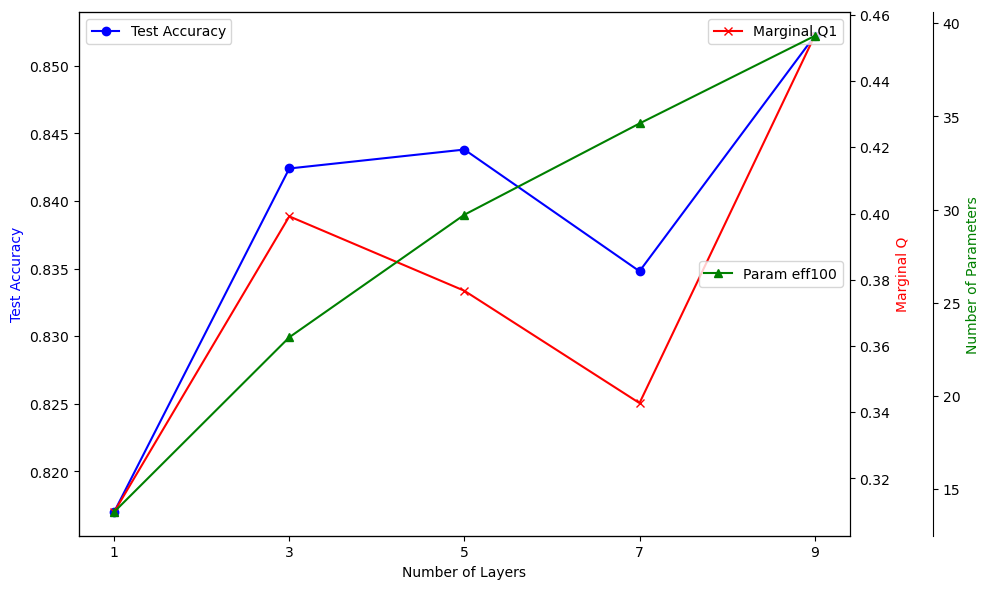

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming num_layers_list is defined somewhere above
# num_layers_list = [1, 3, 5, 7, 9]

def getplot_layers(num_qubits, var_ansatz, r, exp_range=5):
    fig, ax_left = plt.subplots(figsize=(10, 6))

    # Create a second y-axis sharing the same x-axis
    ax_right = ax_left.twinx()

    # Create a third y-axis
    ax_right2 = ax_left.twinx()

    # Offset the third y-axis
    ax_right2.spines['right'].set_position(('outward', 60))  # 60 points outward

    # Ensure that the frame looks correct
    ax_right2.spines['right'].set_visible(True)

    g_mean_list = []
    test_acc_mean_list = []
    mu_marg_Q1_mean_list = []
    mu_marg_Q2_mean_list = []
    mu_marg_mean_mean_list = []
    mu_param_mean_list = []
    mu_param_eff10_mean_list = []
    mu_param_eff100_mean_list = []

    for num_layers in num_layers_list:
        (g_mean, _), (test_acc_mean, _), (mu_marg_Q1_mean, _), (mu_marg_Q2_mean, _), (mu_marg_mean_mean, _), (mu_param_mean, _), (mu_param_eff10_mean, _), (mu_param_eff100_mean, _) = get_data(num_qubits, r, var_ansatz, num_layers, exp_range)
        
        g_mean_list.append(g_mean)
        test_acc_mean_list.append(test_acc_mean)
        mu_marg_Q1_mean_list.append(mu_marg_Q1_mean)
        mu_marg_Q2_mean_list.append(mu_marg_Q2_mean)
        mu_marg_mean_mean_list.append(mu_marg_mean_mean)
        mu_param_mean_list.append(np.sqrt(mu_param_mean))
        mu_param_eff10_mean_list.append(np.sqrt(mu_param_eff10_mean))  
        mu_param_eff100_mean_list.append(np.sqrt(mu_param_eff100_mean))

    # Plotting on the left y-axis (Test Accuracy)
    ax_left.plot(num_layers_list, test_acc_mean_list, label='Test Accuracy', marker='o', color='blue')
    ax_left.set_ylabel('Test Accuracy', color='blue')

    # Plotting on the right y-axis (Marginal Q)
    ax_right.plot(num_layers_list, mu_marg_Q1_mean_list, label='Marginal Q1', marker='x', color='red')
    ax_right.set_ylabel('Marginal Q', color='red')

    # Plotting on the third y-axis (Parameters)
    ax_right2.plot(num_layers_list, mu_param_eff100_mean_list, label='Param eff100', marker='^', color='green')
    ax_right2.set_ylabel('Number of Parameters', color='green')

    # Adding legends
    ax_left.legend(loc='upper left')
    ax_right.legend(loc='upper right')
    ax_right2.legend(loc='center right')

    # Set x-axis label
    ax_left.set_xlabel('Number of Layers')
    ax_left.set_xticks(num_layers_list)

    # Adjust layout to accommodate the third y-axis
    fig.tight_layout()
    
    plt.show()

# Example usage
getplot_layers(8, "QCNN_not_shared", 0.0)


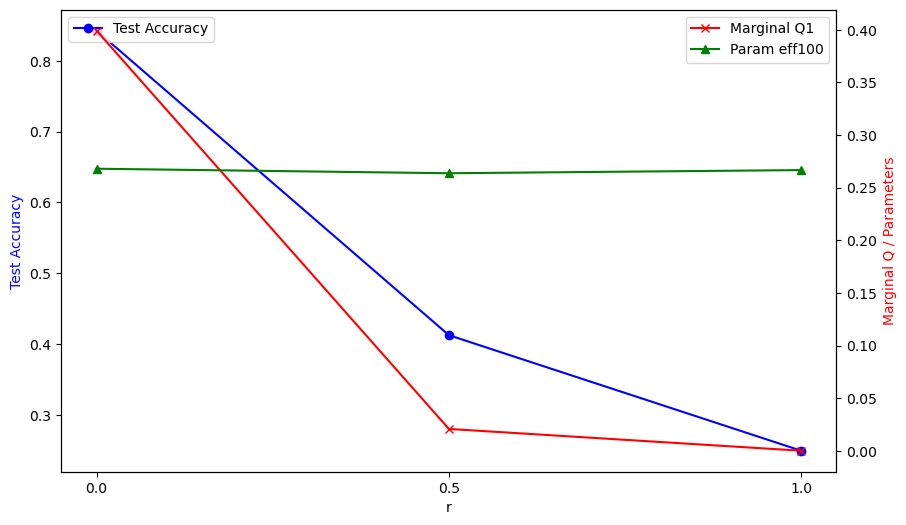

In [102]:

import matplotlib.pyplot as plt

def getplot_r(num_qubits, var_ansatz, num_layers, exp_range=5):
    fig, ax_left = plt.subplots(figsize=(10, 6))

    # Create a second y-axis sharing the same x-axis
    ax_right = ax_left.twinx()

    g_mean_list = []
    test_acc_mean_list = []
    mu_marg_Q1_mean_list = []
    mu_marg_Q2_mean_list = []
    mu_marg_mean_mean_list = []
    mu_param_mean_list = []
    mu_param_eff10_mean_list = []
    mu_param_eff100_mean_list = []

    for r in r_list:
        (g_mean, _), (test_acc_mean, _), (mu_marg_Q1_mean, _), (mu_marg_Q2_mean, _), (mu_marg_mean_mean, _), (mu_param_mean, _), (mu_param_eff10_mean, _), (mu_param_eff100_mean, _) = get_data(num_qubits, r, var_ansatz, num_layers, exp_range)
        
        g_mean_list.append(g_mean)
        test_acc_mean_list.append(test_acc_mean)
        mu_marg_Q1_mean_list.append(mu_marg_Q1_mean)
        mu_marg_Q2_mean_list.append(mu_marg_Q2_mean)
        mu_marg_mean_mean_list.append(mu_marg_mean_mean)
        mu_param_mean_list.append(mu_param_mean / 2000)  # Normalizing by 2000 as in original code
        mu_param_eff10_mean_list.append(mu_param_eff10_mean / 2000)  # Normalizing by 2000 as in original code
        mu_param_eff100_mean_list.append(mu_param_eff100_mean / 2000)  # Normalizing by 2000 as in original code

    # Plotting on the left y-axis without error bars
    ax_left.plot(r_list, test_acc_mean_list, label='Test Accuracy', marker='o', color='blue')
    #ax_left.plot(r_list, g_mean_list, label='Generalization Gap', marker='s', color='purple')
    ax_left.set_ylabel('Test Accuracy', color='blue')

    # Plotting on the right y-axis without error bars
    ax_right.plot(r_list, mu_marg_Q1_mean_list, label='Marginal Q1', marker='x', color='red')
    #ax_right.plot(r_list, mu_marg_Q2_mean_list, label='Marginal Q2', marker='s', color='purple')
    #ax_right.plot(r_list, mu_marg_mean_mean_list, label='Marginal Mean', marker='d', color='orange')
    #ax_right.plot(r_list, mu_param_mean_list, label='Parameters', marker='*', color='black')
    #ax_right.plot(r_list, mu_param_eff10_mean_list, label='Param eff10', marker='v', color='cyan')
    ax_right.plot(r_list, mu_param_eff100_mean_list, label='Param eff100', marker='^', color='green')
    ax_right.set_ylabel('Marginal Q / Parameters', color='red')

    # Adding legends
    ax_left.legend(loc='upper left')
    ax_right.legend(loc='upper right')

    # Set x-axis label
    ax_left.set_xlabel('r')
    ax_left.set_xticks(r_list)
    
    plt.show()

# Example usage
# getplot_r(num_qubits

getplot_r(8, "QCNN_not_shared", 3)

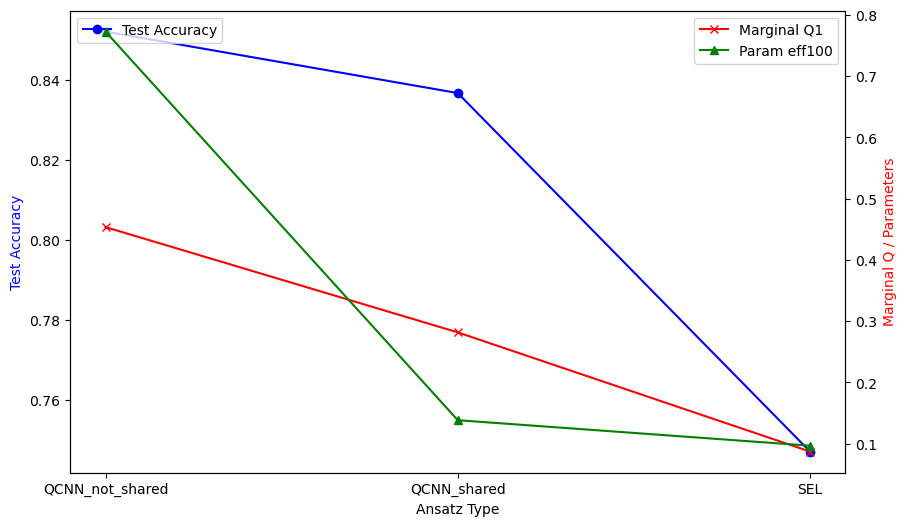

In [108]:
import matplotlib.pyplot as plt

def getplot_ansatz(num_qubits, r, num_layers, exp_range=5):
    fig, ax_left = plt.subplots(figsize=(10, 6))

    # Create a second y-axis sharing the same x-axis
    ax_right = ax_left.twinx()

    g_mean_list = []
    test_acc_mean_list = []
    mu_marg_Q1_mean_list = []
    mu_marg_Q2_mean_list = []
    mu_marg_mean_mean_list = []
    mu_param_mean_list = []
    mu_param_eff10_mean_list = []
    mu_param_eff100_mean_list = []

    for var_ansatz in var_ansatz_list:
        (g_mean, _), (test_acc_mean, _), (mu_marg_Q1_mean, _), (mu_marg_Q2_mean, _), (mu_marg_mean_mean, _), (mu_param_mean, _), (mu_param_eff10_mean, _), (mu_param_eff100_mean, _) = get_data(num_qubits, r, var_ansatz, num_layers, exp_range)
        
        g_mean_list.append(g_mean)
        test_acc_mean_list.append(test_acc_mean)
        mu_marg_Q1_mean_list.append(mu_marg_Q1_mean)
        mu_marg_Q2_mean_list.append(mu_marg_Q2_mean)
        mu_marg_mean_mean_list.append(mu_marg_mean_mean)
        mu_param_mean_list.append(mu_param_mean / 2000)  # Normalizing by 2000 as in original code
        mu_param_eff10_mean_list.append(mu_param_eff10_mean / 2000)  # Normalizing by 2000 as in original code
        mu_param_eff100_mean_list.append(mu_param_eff100_mean / 2000)  # Normalizing by 2000 as in original code

    # Plotting on the left y-axis without error bars
    ax_left.plot(var_ansatz_list, test_acc_mean_list, label='Test Accuracy', marker='o', color='blue')
    ax_left.set_ylabel('Test Accuracy', color='blue')

    # Plotting on the right y-axis without error bars
    ax_right.plot(var_ansatz_list, mu_marg_Q1_mean_list, label='Marginal Q1', marker='x', color='red')
    #ax_right.plot(var_ansatz_list, mu_marg_Q2_mean_list, label='Marginal Q2', marker='s', color='purple')
    #ax_right.plot(var_ansatz_list, mu_marg_mean_mean_list, label='Marginal Mean', marker='d', color='orange')
    #ax_right.plot(var_ansatz_list, mu_param_mean_list, label='Parameters', marker='*', color='black')
    #ax_right.plot(var_ansatz_list, mu_param_eff10_mean_list, label='Param eff10', marker='v', color='cyan')
    ax_right.plot(var_ansatz_list, mu_param_eff100_mean_list, label='Param eff100', marker='^', color='green')
    ax_right.set_ylabel('Marginal Q / Parameters', color='red')

    # Adding legends
    ax_left.legend(loc='upper left')
    ax_right.legend(loc='upper right')

    # Set x-axis label
    ax_left.set_xlabel('Ansatz Type')
    ax_left.set_xticks(range(len(var_ansatz_list)))
    ax_left.set_xticklabels(var_ansatz_list)
    
    plt.show()

getplot_ansatz(8, 0.0, 9)